<a href="https://colab.research.google.com/github/IamBhanuYenumula/Byen_DataScience_expo/blob/main/Feature_Selection_using_BackwardElimination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
pip install --upgrade scikit-learn mlxtend


In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

url="https://raw.githubusercontent.com/IamBhanuYenumula/Byen_DataScience_expo/main/Datasets/BostonHousing.csv"

# load dataset
df=pd.read_csv(url)

# seperate the variables
X=df.drop("medv", axis=1)
y=df['medv']

# split data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(404, 13)
(102, 13)
(404,)
(102,)


In [47]:
# applying Standard scalar
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [48]:
# baseline model
model = LinearRegression()

print("training", np.mean(cross_val_score(model,X_train,y_train,cv=5,scoring='r2')))
print("testing", np.mean(cross_val_score(model,X_test,y_test,cv=5,scoring='r2')))

training 0.7244357342240263
testing 0.5451790940964926


In [49]:
lr=LinearRegression()
# perform backward elimination
sfs = SFS(lr, k_features='best', forward=False,floating=False,scoring='r2',cv=5)
sfs.fit(X_train,y_train)

SequentialFeatureSelector(estimator=LinearRegression(), forward=False,
                          k_features=(1, 13), scoring='r2')

In [50]:
sfs.k_feature_idx_

(0, 3, 4, 5, 7, 8, 9, 10, 11, 12)

In [51]:
# taking out adjusted R2 score
def adjust_r2(r2, num_examples, num_features):
  coef = (num_examples - 1)/(num_examples - num_features -1)
  return 1 - (1-r2)*coef

metric_df=pd.DataFrame.from_dict(sfs.get_metric_dict()).T
metric_df['observations'] = 404
metric_df['num_features'] = metric_df['feature_idx'].apply(lambda x:len(x))
metric_df['adjusted_r2'] = adjust_r2(metric_df['avg_score'],metric_df['observations'],metric_df['num_features'])

metric_df

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,observations,num_features,adjusted_r2
13,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7750198245492361, 0.6242494504269509, 0.759...",0.724436,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.081659,0.063534,0.031767,404,13,0.71525
12,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7803845935030925, 0.6251539177074756, 0.759...",0.725636,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.082429,0.064133,0.032066,404,12,0.717216
11,"(0, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7884547664556615, 0.6205822778720618, 0.753...",0.726015,"(0, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.087825,0.068331,0.034165,404,11,0.718327
10,"(0, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.788177428705694, 0.6205265408146727, 0.7552...",0.726122,"(0, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.087944,0.068424,0.034212,404,10,0.719153
9,"(0, 3, 4, 5, 7, 8, 10, 11, 12)","[0.7795789280495411, 0.6175447522819577, 0.749...",0.723533,"(0, 3, 4, 5, 7, 8, 10, 11, 12)",0.087503,0.06808,0.03404,404,9,0.717218
8,"(0, 3, 4, 5, 7, 10, 11, 12)","[0.7758510999506724, 0.615363489409088, 0.7400...",0.719883,"(0, 3, 4, 5, 7, 10, 11, 12)",0.093221,0.072529,0.036265,404,8,0.71421
7,"(3, 4, 5, 7, 10, 11, 12)","[0.7693061589941236, 0.6161051136591215, 0.733...",0.717804,"(3, 4, 5, 7, 10, 11, 12)",0.091209,0.070964,0.035482,404,7,0.712816
6,"(4, 5, 7, 10, 11, 12)","[0.7788452493110056, 0.6218554113167254, 0.720...",0.712919,"(4, 5, 7, 10, 11, 12)",0.093501,0.072747,0.036374,404,6,0.70858
5,"(4, 5, 7, 10, 12)","[0.7524334458987962, 0.6197369305300298, 0.716...",0.700108,"(4, 5, 7, 10, 12)",0.090735,0.070595,0.035298,404,5,0.696341
4,"(5, 7, 10, 12)","[0.7162802396082412, 0.6023240279107933, 0.705...",0.680996,"(5, 7, 10, 12)",0.087197,0.067843,0.033921,404,4,0.677798


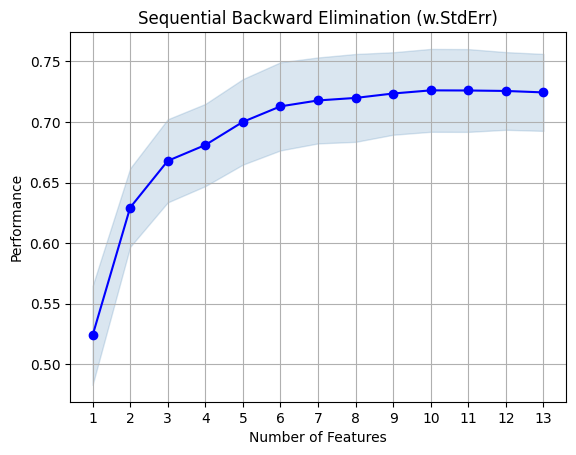

In [52]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1=plot_sfs(sfs.get_metric_dict(),kind='std_err')
plt.title('Sequential Backward Elimination (w.StdErr)')
plt.grid()
plt.show()

In [53]:
X_train_sel=sfs.transform(X_train)
X_test_sel=sfs.transform(X_test)

model=LinearRegression()

print('Training', np.mean(cross_val_score(model,X_train_sel,y_train,cv=5,scoring='r2')))
print('Testing', np.mean(cross_val_score(model,X_test_sel,y_test,cv=5,scoring='r2')))
print(X_train_sel.shape)
print(X_test_sel.shape)

Training 0.7261221606129598
Testing 0.5246730606335527
(404, 10)
(102, 10)
